In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
import matplotlib.image as mpimgdf
%matplotlib notebook

In [2]:
df=pd.read_csv('Reddsa2.csv')
sensors=pd.DataFrame()
sensors['Sn']=df['Sn'].unique()
lat=df['Lat'].unique()
lon=df['Lon'].unique()

sensors['Lat']=lat
sensors['Lon']=lon


df['HsSendDate']=pd.to_datetime(df['HsSendDate'])

In [3]:
#time
origin=21

count=0
firstTrigged=[]
tp=0
i=0
while count<len(sensors):
    s=sensors['Sn'][count]
    if df['Sn'][i]==s:
        t=df['HsSendDate'][i].second
        while t<tp:
            t+=60
        
        firstTrigged.append(t-origin)
        count+=1
        tp=t
    i+=1


In [4]:
sensors['Trigged']=firstTrigged

In [5]:
class Sensor(object):
    def __init__(self,lat,lon,serialNumber,trigged,color='red'):
        self.lat=lat
        self.lon=lon
        self.serialNumber=serialNumber
        self.trigged=trigged
        self.color=color
        
    def trigg(self,t):
        if t > self.trigged:
            self.color='green'

In [33]:
sensorlist=[]
for i in range(len(sensors)):
    sensor=sensors.iloc[i]
    s=Sensor(lat=sensor['Lat'],lon=sensor['Lon'],serialNumber=sensor['Sn'],trigged=sensor['Trigged'])
    sensorlist.append(s)

<IPython.core.display.Javascript object>


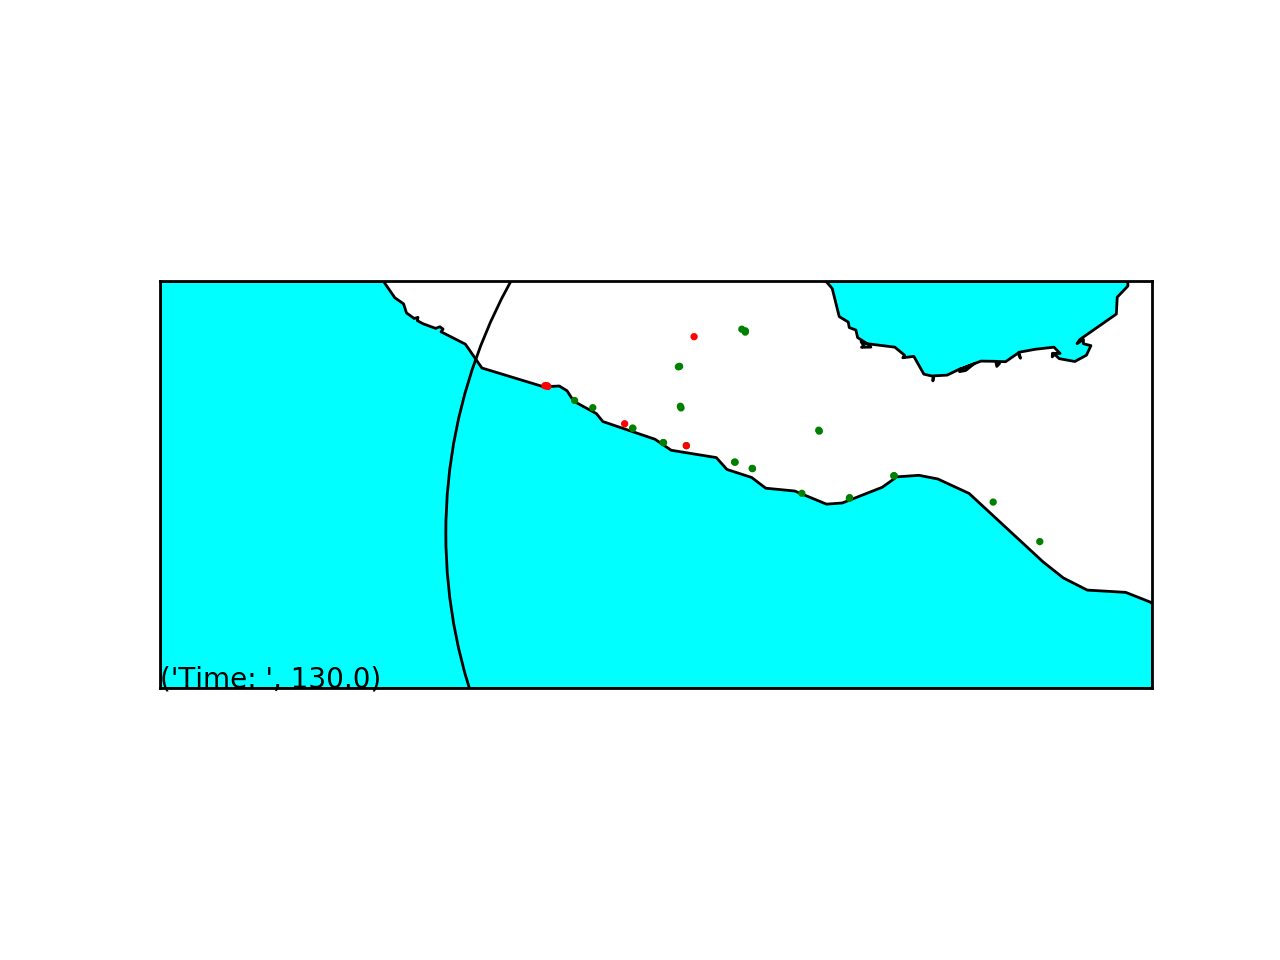

/Users/endrepaulsen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/endrepaulsen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


ims created


In [34]:

fig, ax = plt.subplots()


m = Basemap(projection='mill',llcrnrlon=-110,llcrnrlat=12,urcrnrlat=20,urcrnrlon=-90,resolution='l')#lat_0=45,lon_0=45,height=200,width=200)#llcrnrlon=45,llcrnrlat=45,urcrnrlat=46,urcrnrlon=46)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='white',lake_color='aqua')
#ax.scatter(m(lon,lat)[0],m(lon,lat)[1],s=30,c='red',zorder=10,edgecolor='black')


#img=mpimg.imread('sensors.png')

#h,w,d=img.shape

#ax.imshow(img)#,origin='lower')
#ax.set_xlim(0,w)
#ax.set_ylim(0,h)

#ax.plot(np.arange(w),np.arange(w))

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame

ims = []
p1color=''
interv=100

epi=[-93.715,15.068]
fepi=m(epi[0],epi[1])
    
for i in range(1000):
    time=i*interv/100
    c_quake=ax.add_artist(plt.Circle(fepi,9*1000*time,fill=False))#,zorder=10) 
    
    circles=[]
    for sensor in sensorlist:
        sensor.trigg(time)
        
        fcords=m(sensor.lon,sensor.lat)
        circles.append(ax.add_artist(plt.Circle((fcords),10000,zorder=20,color=sensor.color)))
    
    
    #quake=ax.add_artist(c_quake)
    #im2=ax.add_artist(y)
    circles.append(c_quake)

    circles.append(ax.text(x=1000,y=1000,s=('Time: ',time)))
    ims.append(circles)
    
print('ims created')

ani = animation.ArtistAnimation(fig, ims, interval=interv, blit=True,
                                repeat_delay=1000)

#ani.save('dynamic_images.mp4')

plt.show()

In [28]:
!brew install imagemagick

/bin/sh: brew: command not found


In [133]:
fcords=m(sensor.lat,sensor.lon)
fcords

(13975583.371907298, 1e+30)

In [152]:
epi=(15.068, 93.715)
m(epi[0],epi[1])

(13906920.537036506, 1e+30)